# Transformaciones morfológicas

## Introdución
Las transformaciones morfológicas son algunas operaciones simples basadas en la forma de la imagen. Normalmente se realiza en imágenes binarias. Necesita dos entradas, una es nuestra imagen original, la segunda se llama elemento estructurante o kernel que decide la naturaleza de la operación. Dos operadores morfológicos básicos son la Erosión y la Dilatación. Luego, sus formas variantes como Apertura, Cierre, Gradiente, etc. también entran en juego. Los veremos uno por uno con la ayuda de la siguiente imagen:

<img src="Imagenes_documento\imagenMorfo.png" width="200" height="150">


## 1. Erosión
La idea básica de la erosión es como la erosión del suelo, erosiona los límites del objeto en primer plano (siempre trate de mantener el primer plano en blanco). Entonces, ¿qué hace? El núcleo se desliza a través de la imagen (como en la convolución 2D). Un píxel en la imagen original (ya sea 1 o 0) se considerará 1 solo si todos los píxeles debajo del núcleo son 1; de lo contrario, se erosiona (se hace cero).

Entonces, lo que sucede es que todos los píxeles cercanos al límite se descartarán según el tamaño del kernel. Entonces, el grosor o el tamaño del objeto en primer plano disminuye o simplemente disminuye la región blanca en la imagen. Es útil para eliminar pequeños ruidos blancos (como hemos visto en el capítulo de espacio de color), separar dos objetos conectados, etc.

Aquí, como ejemplo, usaría un kernel 5x5 lleno de unos.

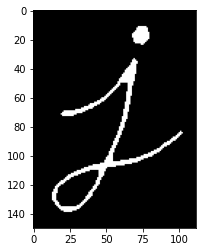

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Imagenes_documento\\imagenMorfo.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
plt.imshow(erosion, cmap='gray')

## 2. Dilatación
Es justo lo contrario de la erosión. Aquí, un elemento de píxel es '1' si al menos un píxel debajo del kernel es '1'. Por lo tanto, aumenta la región blanca en la imagen o aumenta el tamaño del objeto en primer plano. Normalmente, en casos como la eliminación de ruido, la erosión es seguida por la dilatación. Porque la erosión elimina los ruidos blancos, pero también encoge nuestro objeto. Entonces lo dilatamos. Dado que el ruido se ha ido, no volverán, pero el área de nuestro objeto aumenta. También es útil para unir partes rotas de un objeto.

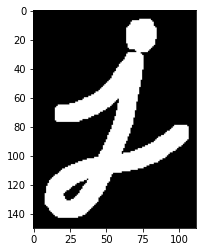

In [4]:
dilation = cv.dilate(img,kernel,iterations = 1)
plt.imshow(dilation, cmap='gray')

## 3. Apertura
La apertura es solo otro nombre de la erosión seguida de la dilatación . Es útil para eliminar el ruido, como explicamos anteriormente. Aquí usamos la función, cv.morphologyEx()

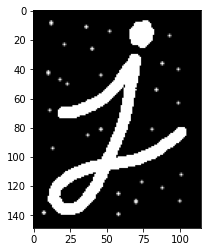

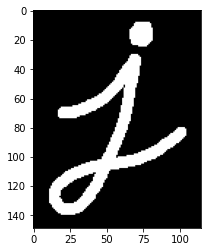

In [9]:

img = cv.imread('Imagenes_documento\\imagenOpen.png',0)
plt.imshow(img, cmap='gray')
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
plt.figure()
plt.imshow(opening, cmap='gray')

## 4. Cierre
El cierre es el reverso de la apertura, la dilatación seguida de la erosión . Es útil para cerrar pequeños agujeros dentro de los objetos de primer plano o pequeños puntos negros en el objeto.

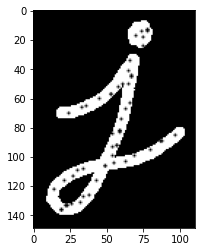

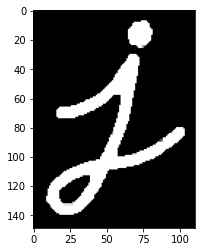

In [11]:
img = cv.imread('Imagenes_documento\\closing.png',0)
plt.imshow(img, cmap='gray')
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.figure()
plt.imshow(closing, cmap='gray')


## 5. Gradiente morfológico
Es la diferencia entre dilatación y erosión de una imagen.
El resultado se verá como el contorno del objeto.

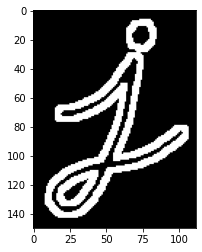

In [13]:
img = cv.imread('Imagenes_documento\\imagenMorfo.png',0)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plt.figure()
plt.imshow(gradient, cmap='gray')

## 6. Sombrero de copa
Es la diferencia entre imagen de entrada y Apertura de la imagen. El siguiente ejemplo está hecho para un kernel 9x9.

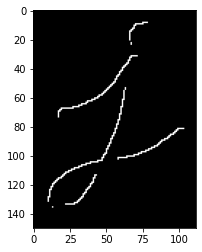

In [20]:
kernel = np.ones((2,2),np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
plt.figure()
plt.imshow(tophat, cmap='gray')

## 7. Sombrero negro
Es la diferencia entre el cierre de la imagen de entrada y la imagen de entrada.

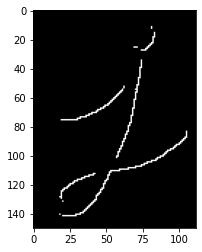

In [21]:
kernel = np.ones((2,2),np.uint8)
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
plt.figure()
plt.imshow(blackhat, cmap='gray')